# Google Drive Connection

In [0]:
## Connecting google drive to colab

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.19-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.19-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.19-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

### Change working directory to where python files are located

In [0]:
import os
default_path = 'drive/EVA4/API'
os.chdir(default_path)
print("Current working directory: "+os.getcwd())

Current working directory: /content/drive/EVA4/API


In [0]:
# google drive path for saving models, graphs and images
PATH = "../Session11"

# Assignment 1
---

Below is the code you used to draw ZIGZAG or CYCLIC TRIANGLE plot.

In [0]:
from __future__ import print_function
import math
import numpy
import matplotlib.pyplot as plt

#----------------------------- Code to display and save plot -------------------------------#
def visualize_save_graph_matplotlib(lines, title, xaxis_title, yaxis_title, path, name):
  plt.figure(figsize=(20,10))
  for line in lines:
    plt.plot(line['x'], line['y'], label=line['name'])
  
  plt.title(title)
  plt.xlabel(xaxis_title)
  plt.ylabel(yaxis_title)
  plt.legend()
  plt.savefig(path+"/"+name+".png")

#----------------------------- Code to generate cyclic triangular plot -------------------------------#
def cyclic_learning_rate(lr_min, lr_max, step_size, max_iteration):
  lr = []
  #max_iteration = 50
  delta_lr = lr_max - lr_min
  x_axis = [i for i in range(max_iteration + 1)]
  for iteration_num in range(max_iteration + 1):
    cycle = math.floor(1 + (iteration_num/(2*step_size)))
    x = abs((iteration_num/step_size) - (2*cycle) + 1)
    lr.append(lr_min + delta_lr*(1-x))
  return x_axis, lr

def generate_cyclic_learning_rate(lr_min, lr_max, step_size, max_iteration, path, name):
  x_axis, lr = cyclic_learning_rate(lr_min, lr_max, step_size, max_iteration)

  # display graph
  lines = [{'x': x_axis, 'y': [lr_max]*len(x_axis), 'name': 'max_lr'}, {'x': x_axis, 'y': lr, 'name': 'lr'}, {'x': x_axis, 'y': [lr_min]*len(x_axis), 'name': 'min_lr'}]
  title, xaxis_title, yaxis_title = "Cyclic Learning Rate", "Iteration", "Learning Rate"
  #display_graph(lines, title, xaxis_title, yaxis_title)
  visualize_save_graph_matplotlib(lines, title, xaxis_title, yaxis_title, path, name)

The above code was saved in file named [custom_cyclic_learning_rate](https://github.com/genigarus/EVA4/blob/master/S11/custom_cyclic_learning_rate.py).

Below is the code for calling the function to generate cyclic traingular graph.

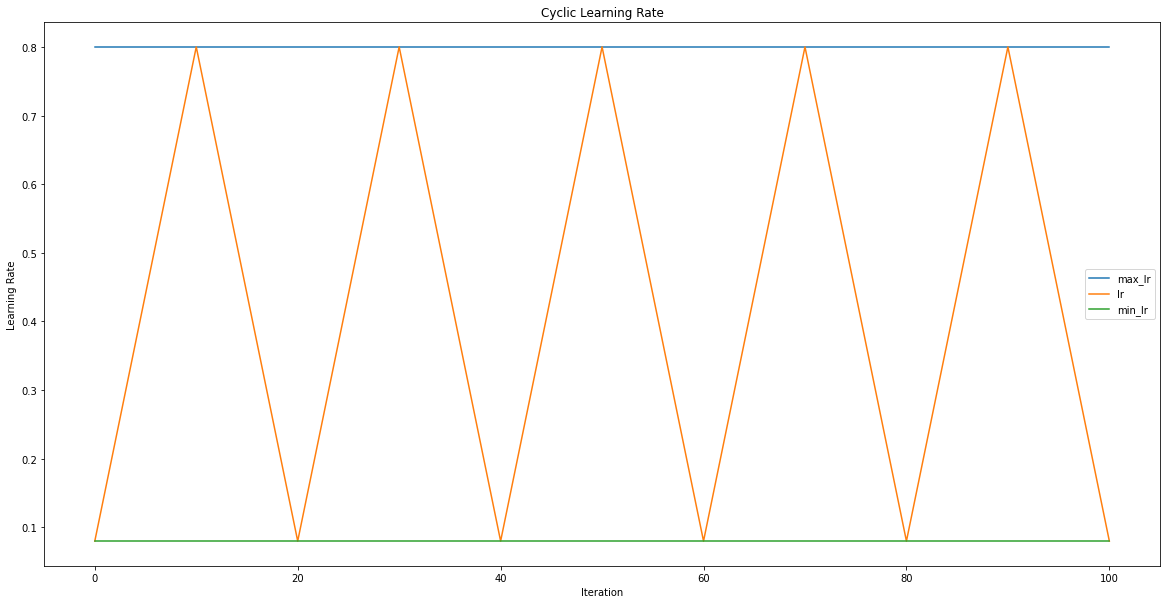

In [0]:
from custom_cyclic_learning_rate import *

lr_min, lr_max, step_size, max_iteration, path, name = 0.08, 0.8, 10, 100, PATH+"/visualization", "clr_graph"
generate_cyclic_learning_rate(lr_min, lr_max, step_size, max_iteration, path, name)